<a href="https://colab.research.google.com/github/Ali-Asgar-Lakdawala/Bike-Sharing-Demand-Prediction/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of the day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

---
#Initializing
---

In [161]:
#importing pandas ,numpy,matplotlib.pyplot & seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
#to display all the graph in the workbook 
%matplotlib inline
sns.set_style("whitegrid",{'grid.linestyle': '--'})

In [162]:
df = pd.read_csv('https://raw.githubusercontent.com/Ali-Asgar-Lakdawala/Bike-Sharing-Demand-Prediction/main/SeoulBikeData.csv', encoding = "ISO-8859-1")

In [163]:
# Set the display figure size using rcParams method 
sns.set(rc={'figure.figsize':(8,6)})
plt.rcParams['figure.figsize'] = [8,6]

---
#EDA
---

In [164]:
og_df=df.copy()

In [165]:
print ('Shape dataset')
print (df.shape)
print ('\n')
print ('Info Dataset')
print (df.info())
print ('\n')
print ('See if any missing value of Dataset')
print (df.isna().sum())

Shape dataset
(8760, 14)


Info Dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Function

In [166]:
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [167]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [168]:
df.Seasons.value_counts()

Summer    2208
Spring    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

In [169]:
df.Holiday.value_counts()

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

In [170]:
df['Functioning Day'].value_counts()

Yes    8465
No      295
Name: Functioning Day, dtype: int64

good news it does not have any null values

In [171]:
# create new day,month, hour info from Pickup time
df['Date']=pd.to_datetime(df['Date'])
df['month'] = df['Date'].apply(lambda x : x.month)
df['day_of_week'] = df['Date'].dt.day_name()
df['weekdays_weekend']=df['day_of_week'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0 )
df=df.drop(columns=['Date','day_of_week'],axis=1)


In [172]:
df['weekdays_weekend'].value_counts()

0    6216
1    2544
Name: weekdays_weekend, dtype: int64

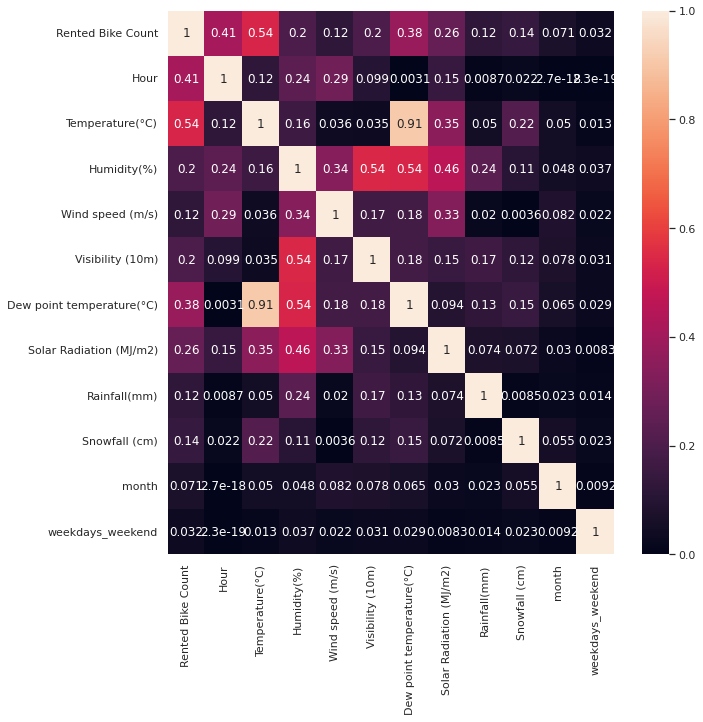

In [173]:
plt.figure(figsize=(10,10))
sns.heatmap(abs(df.corr()),annot=True)


In [174]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
 
   # Calculating VIF
   vif = pd.DataFrame()
   vif["variables"] = X.columns
   vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
 
   return(vif)

In [175]:
calc_vif(df[[i for i in df.describe().columns if i not in ['Rented Bike Count','Dew point temperature(°C)']]])

,variables,VIF
0,Hour,3.961874
1,Temperature(°C),3.236809
2,Humidity(%),6.114153
3,Wind speed (m/s),4.616621
4,Visibility (10m),5.404128
5,Solar Radiation (MJ/m2),2.272068
6,Rainfall(mm),1.081252
7,Snowfall (cm),1.125304
8,month,4.580307
9,weekdays_weekend,1.399708


we can remove dew point tem as it is coorelated to temprature 

In [176]:
numeric_features=df.describe().columns

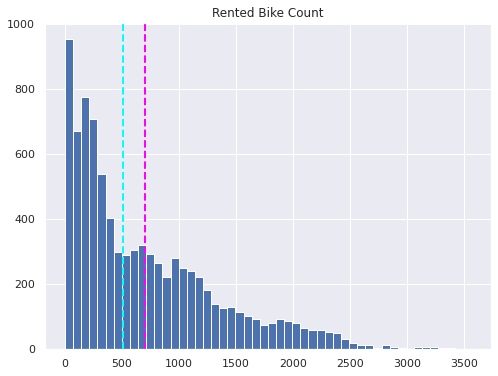

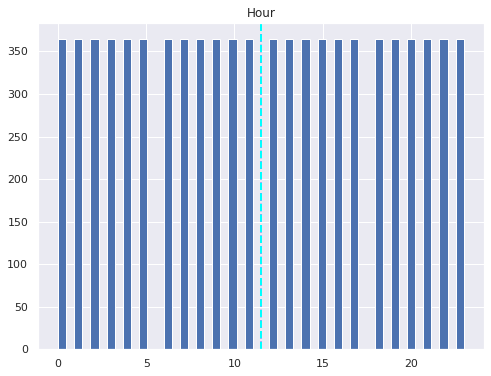

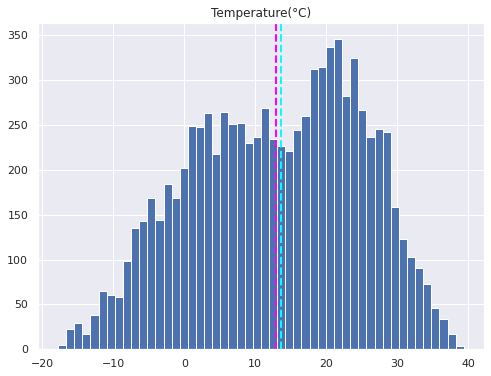

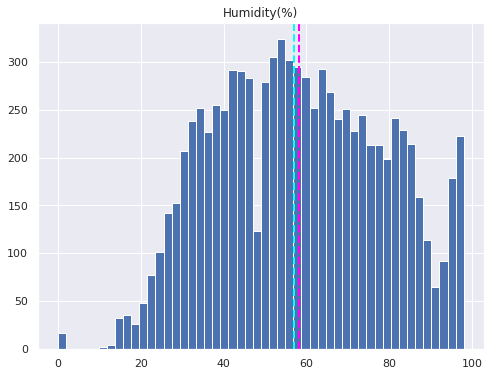

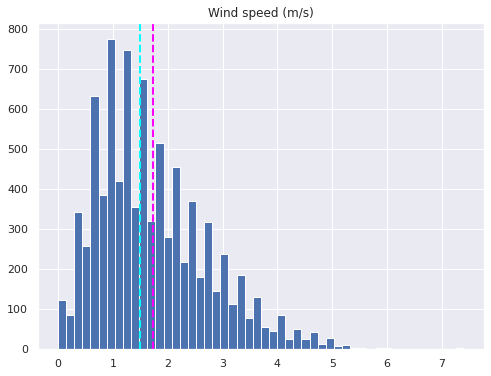

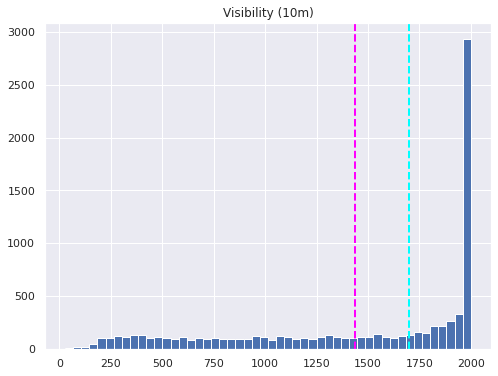

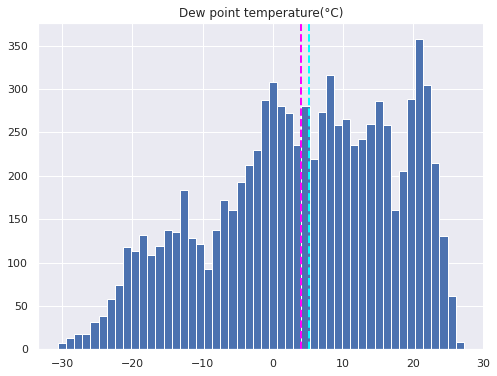

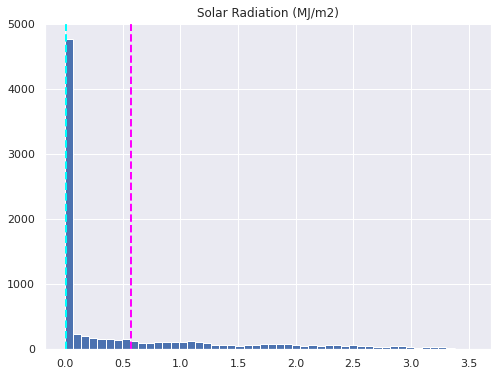

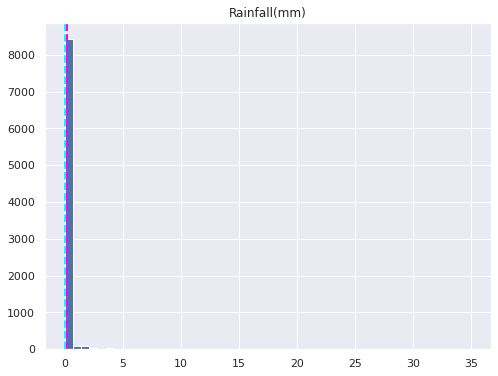

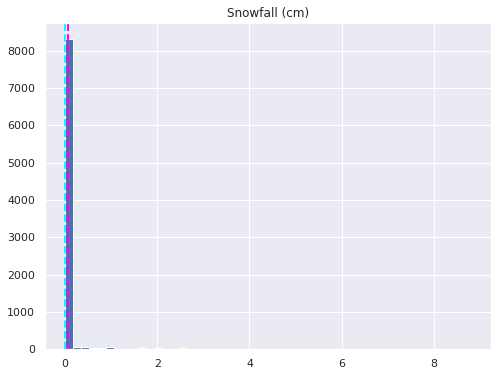

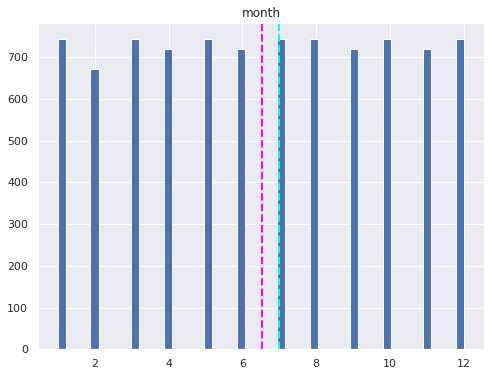

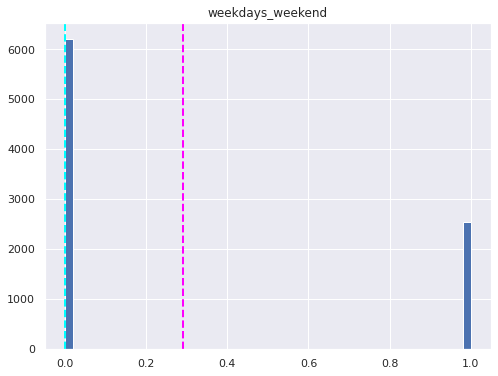

In [177]:
#plotting histogram of all the numeric features of the dataset
for col in numeric_features[:]:
  fig=plt.figure()
  ax=fig.gca()
  feature=df[col]
  feature.hist(bins=50,ax=ax)
  ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
  ax.set_title(col)
plt.show()

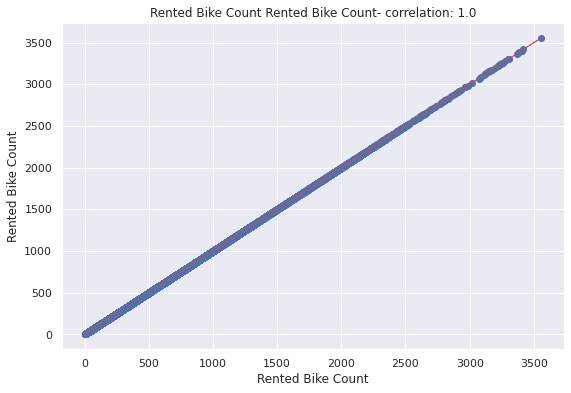

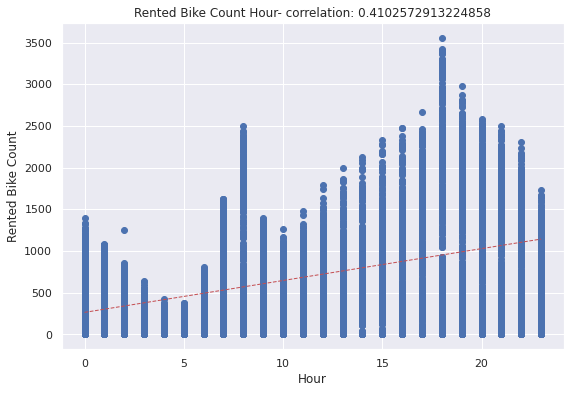

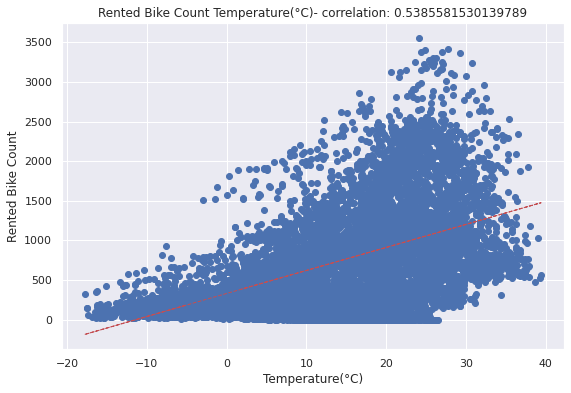

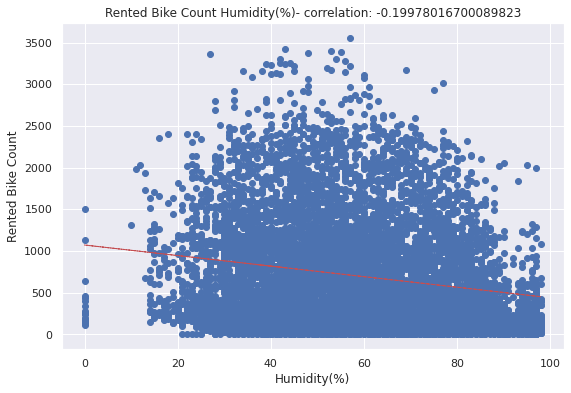

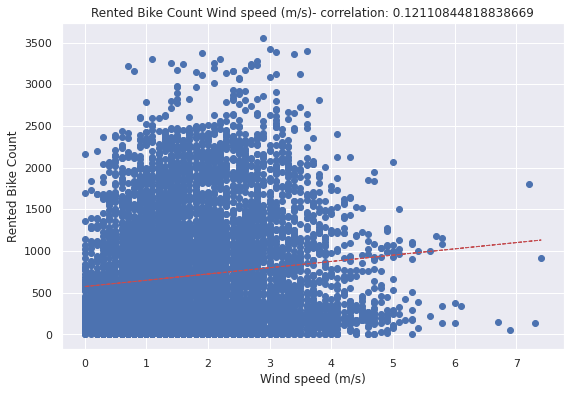

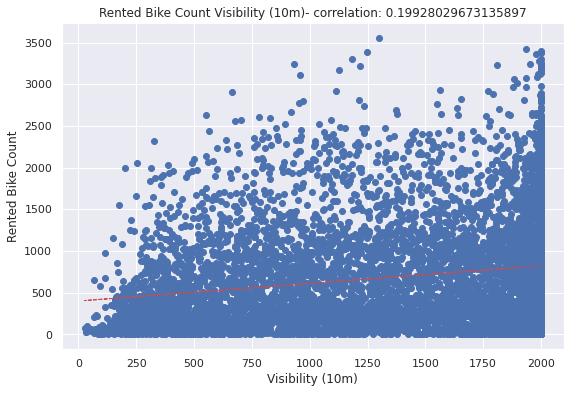

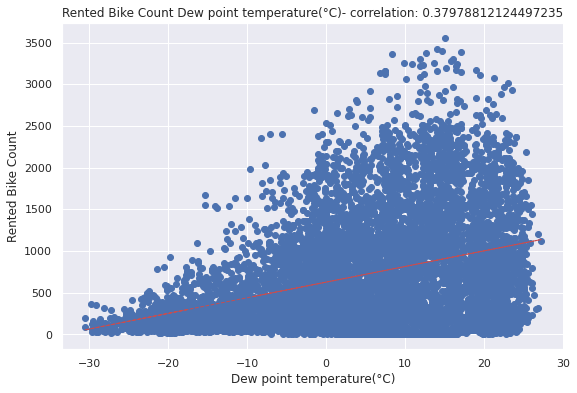

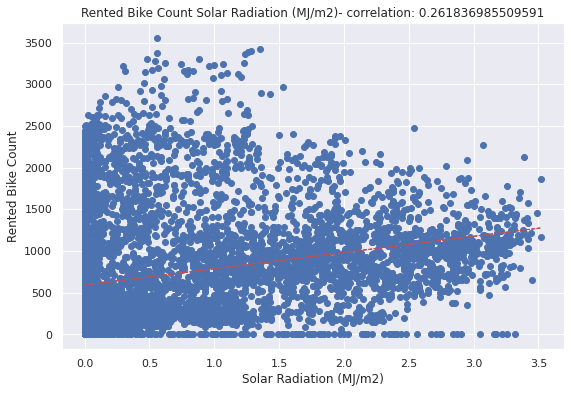

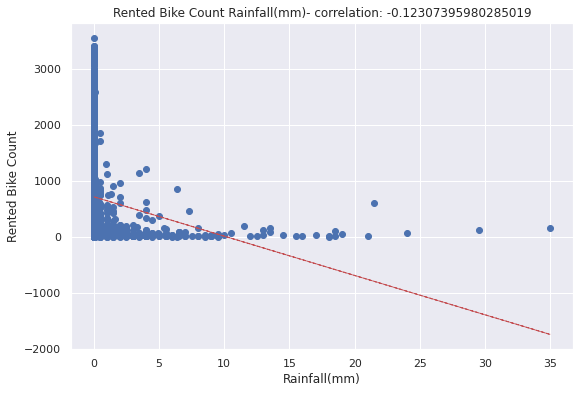

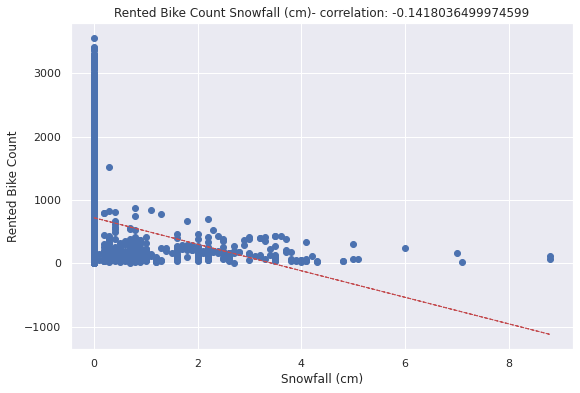

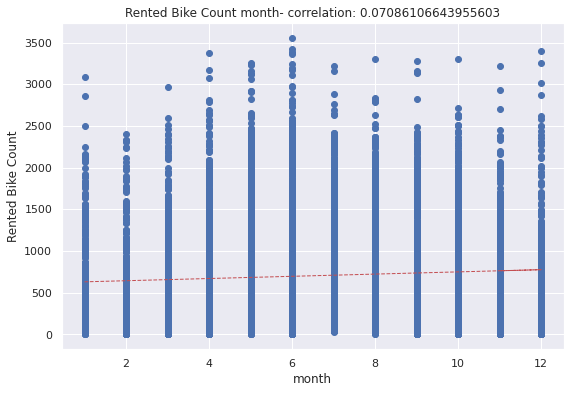

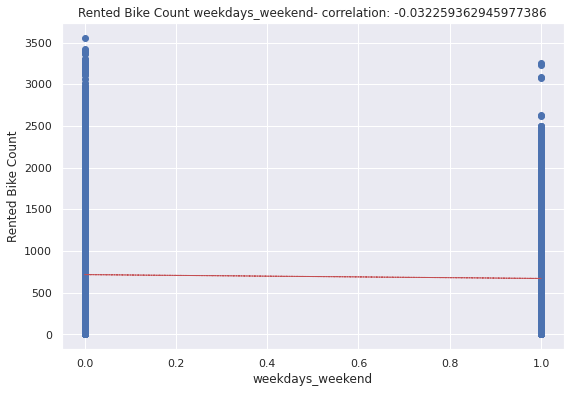

In [178]:
for col in numeric_features:
   fig = plt.figure(figsize=(9, 6))
   ax = fig.gca()
   feature = df[col]
   label = df['Rented Bike Count']
   correlation = feature.corr(label)
   plt.scatter(x=feature, y=label)
   plt.xlabel(col)
   plt.ylabel('Rented Bike Count')
   ax.set_title('Rented Bike Count ' + col + '- correlation: ' + str(correlation))
   z = np.polyfit(df[col], df['Rented Bike Count'], 1)
   y_hat = np.poly1d(z)(df[col])
 
   plt.plot(df[col], y_hat, "r--", lw=1)
 
plt.show()

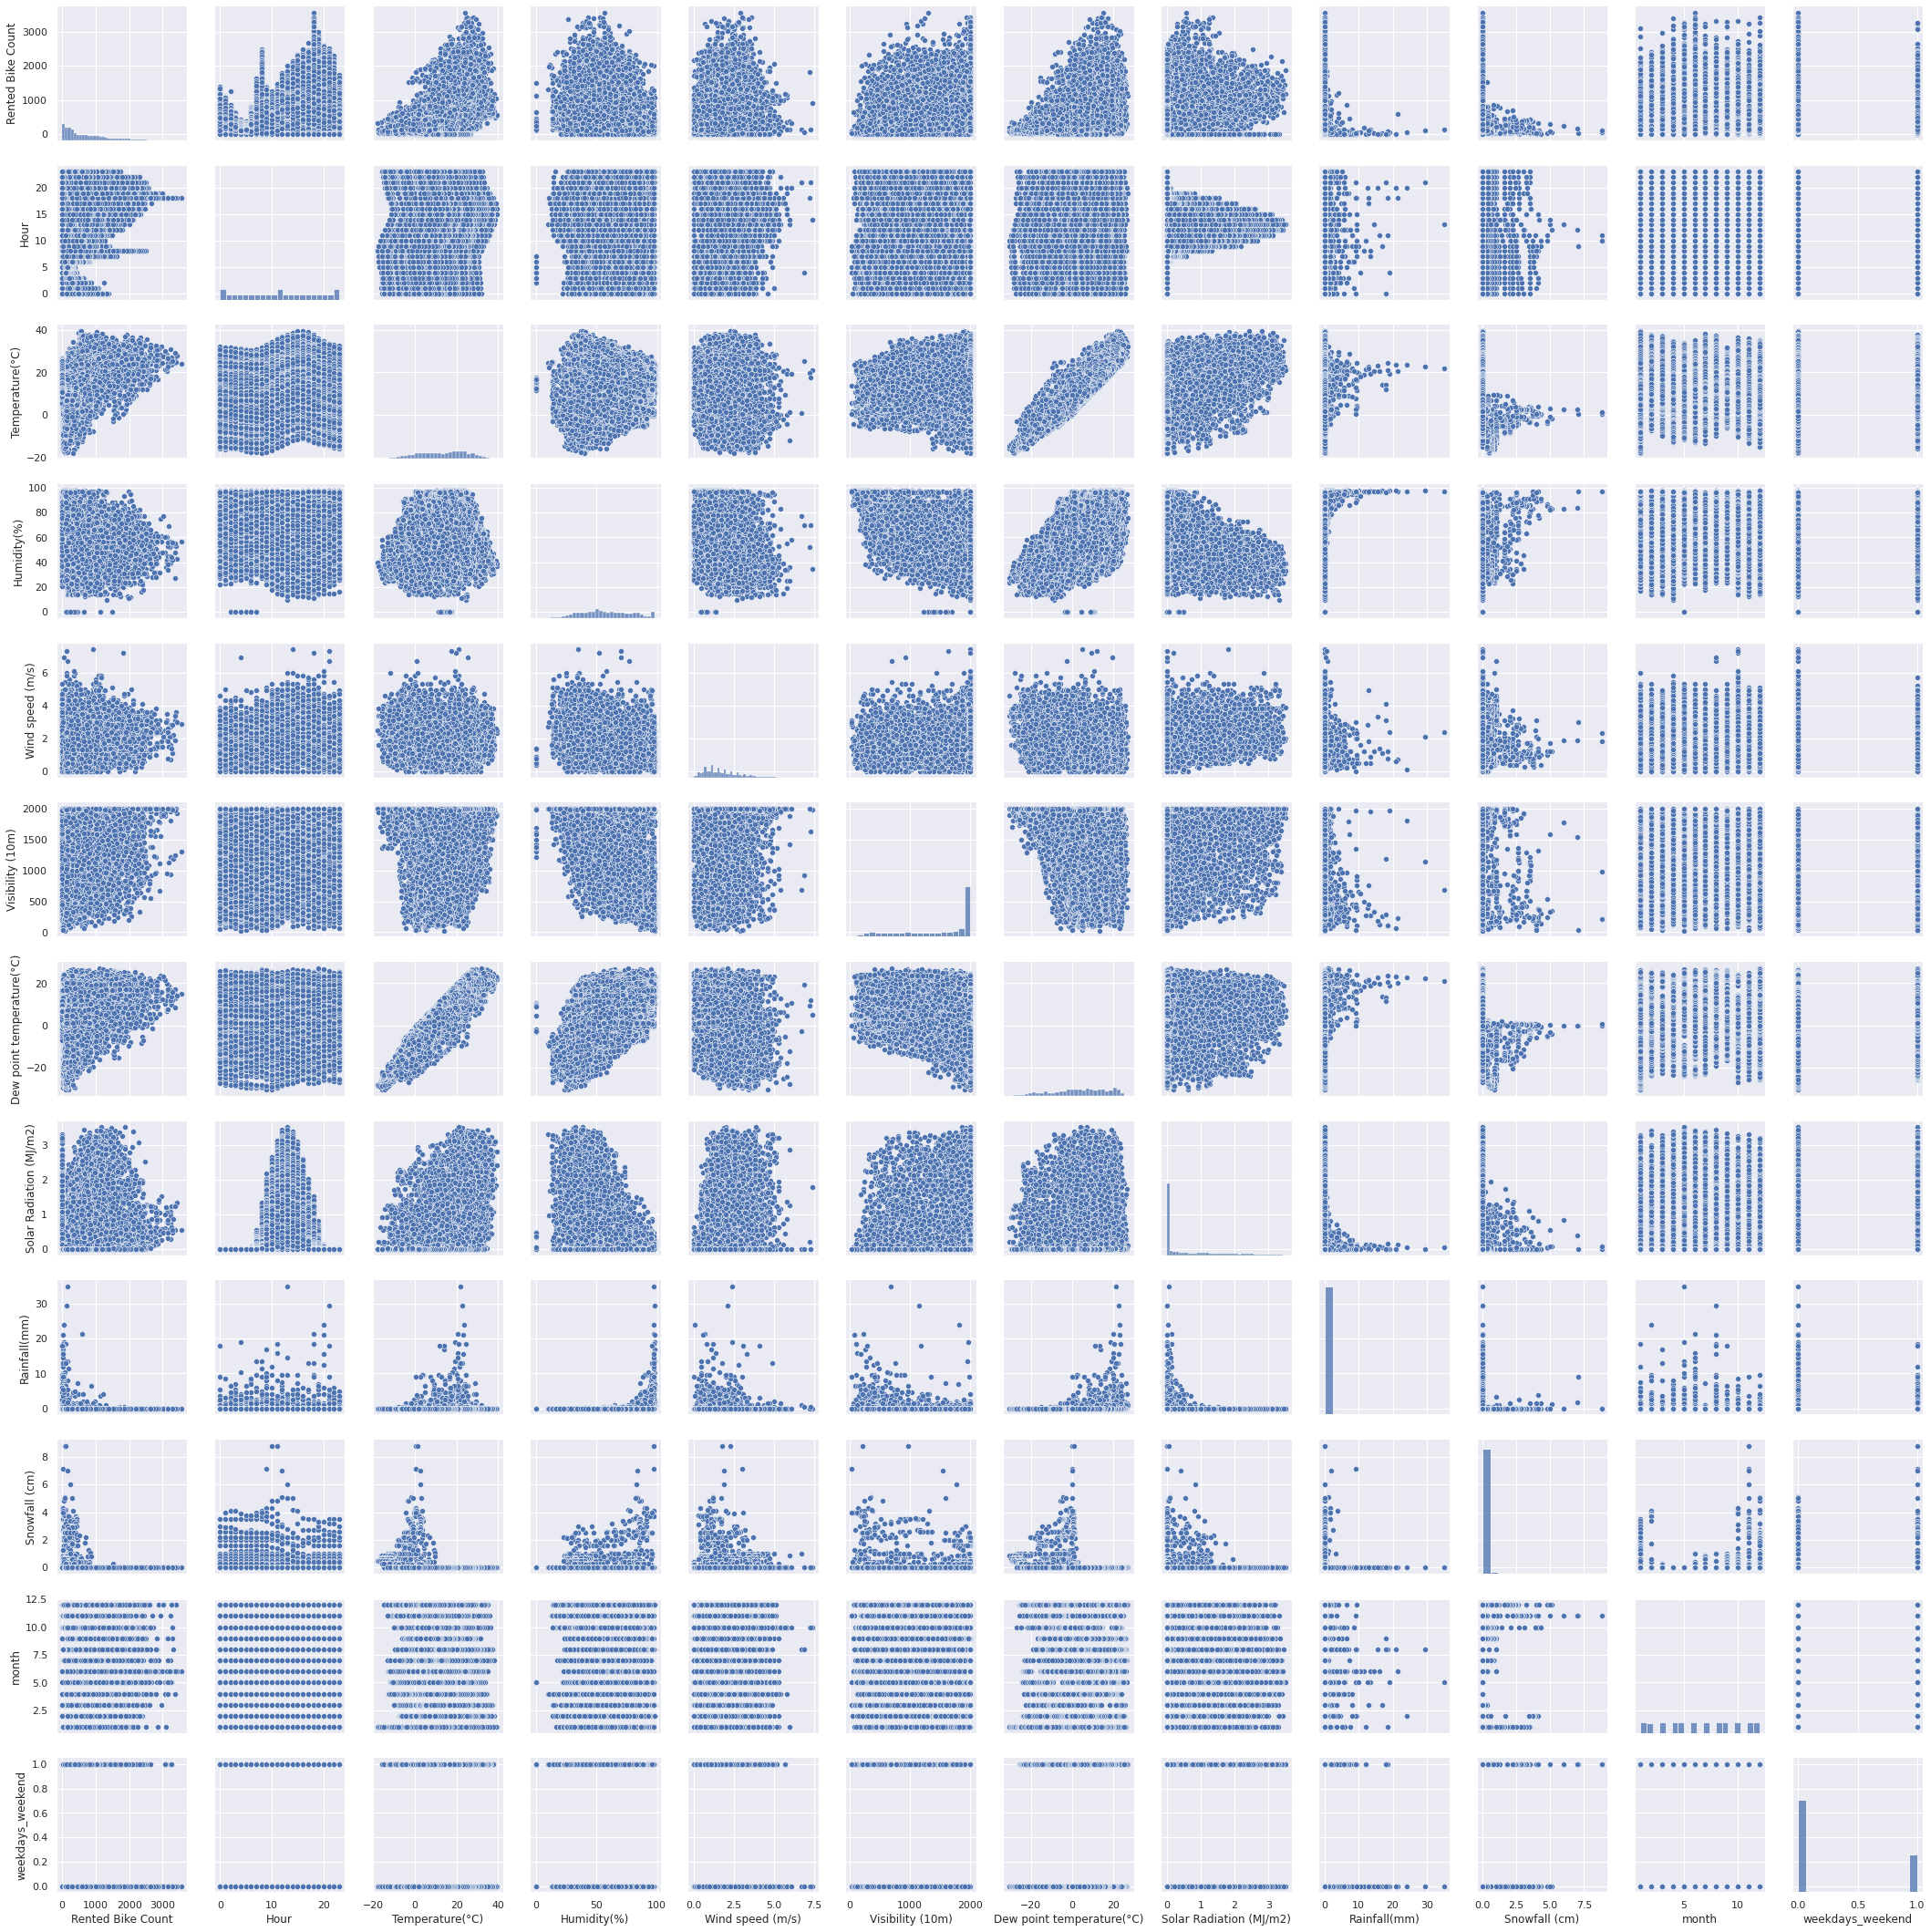

In [179]:
sns.pairplot(df)

In [180]:
numeric_features= df.select_dtypes(exclude='object')
categorical_features=df.select_dtypes(include='object')

In [181]:
numeric_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  month                      8760 non-null   int64  
 11  weekdays_weekend           8760 non-null   int64  
dtypes: float64(6), int64(6)
memory usage: 821.4 KB


In [182]:
categorical_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Seasons          8760 non-null   object
 1   Holiday          8760 non-null   object
 2   Functioning Day  8760 non-null   object
dtypes: object(3)
memory usage: 205.4+ KB


In [183]:
# categorical_features = pd.get_dummies(categorical_features,drop_first=True))
categorical_feature = pd.get_dummies(categorical_features)

In [184]:
categorical_feature

,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_Holiday,Holiday_No Holiday,Functioning Day_No,Functioning Day_Yes
0,0,0,0,1,0,1,0,1
1,0,0,0,1,0,1,0,1
2,0,0,0,1,0,1,0,1
3,0,0,0,1,0,1,0,1
4,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...
8755,1,0,0,0,0,1,0,1
8756,1,0,0,0,0,1,0,1
8757,1,0,0,0,0,1,0,1
8758,1,0,0,0,0,1,0,1


In [185]:
df= pd.concat([categorical_feature,numeric_features],axis=1)

In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Seasons_Autumn             8760 non-null   uint8  
 1   Seasons_Spring             8760 non-null   uint8  
 2   Seasons_Summer             8760 non-null   uint8  
 3   Seasons_Winter             8760 non-null   uint8  
 4   Holiday_Holiday            8760 non-null   uint8  
 5   Holiday_No Holiday         8760 non-null   uint8  
 6   Functioning Day_No         8760 non-null   uint8  
 7   Functioning Day_Yes        8760 non-null   uint8  
 8   Rented Bike Count          8760 non-null   int64  
 9   Hour                       8760 non-null   int64  
 10  Temperature(°C)            8760 non-null   float64
 11  Humidity(%)                8760 non-null   int64  
 12  Wind speed (m/s)           8760 non-null   float64
 13  Visibility (10m)           8760 non-null   int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


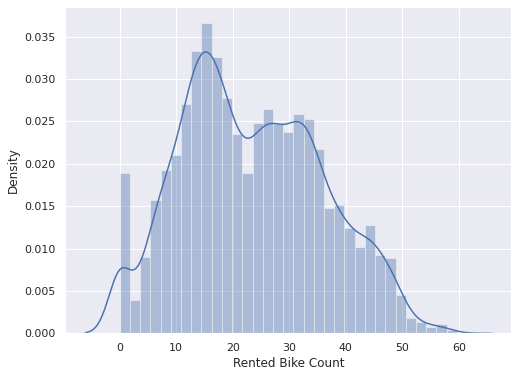

In [187]:
sns.distplot(np.sqrt(df['Rented Bike Count']))

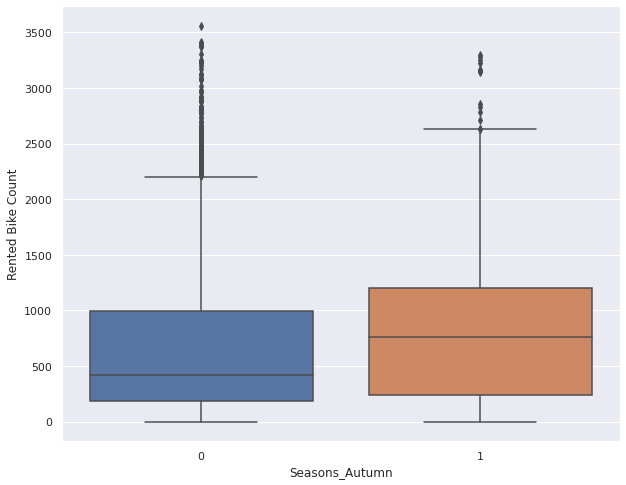

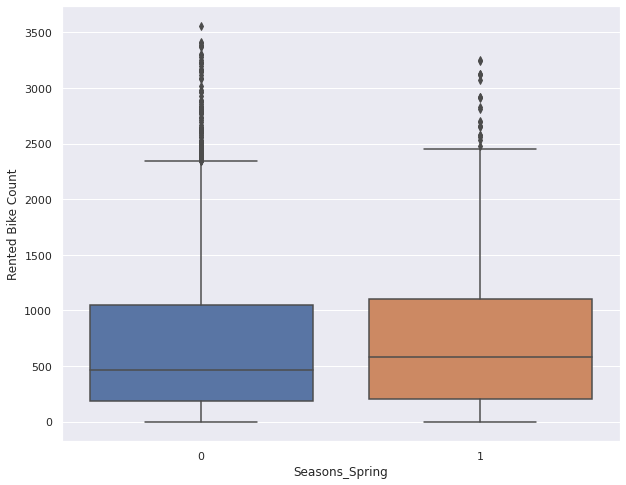

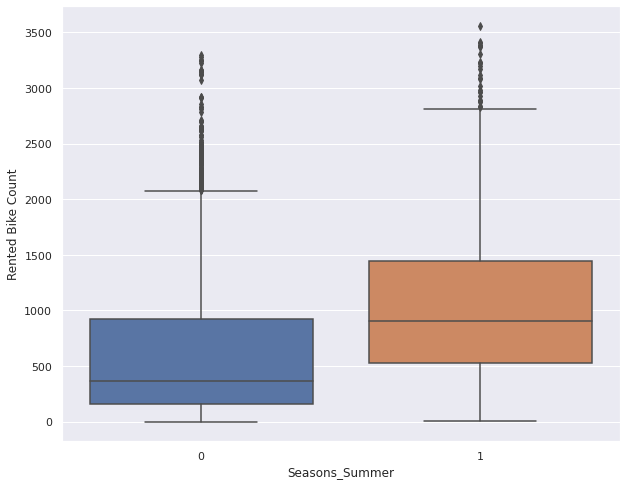

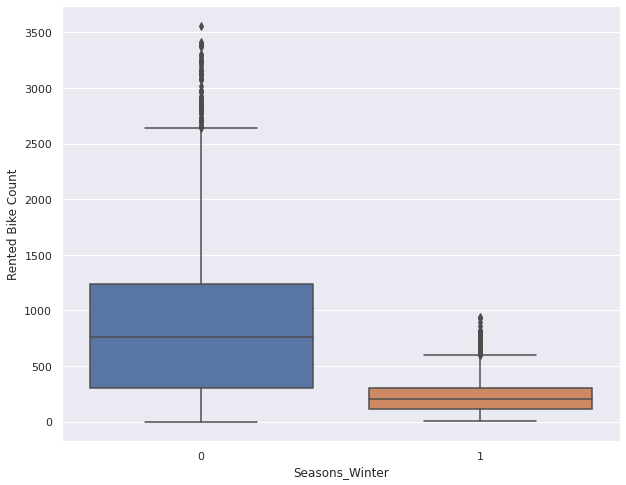

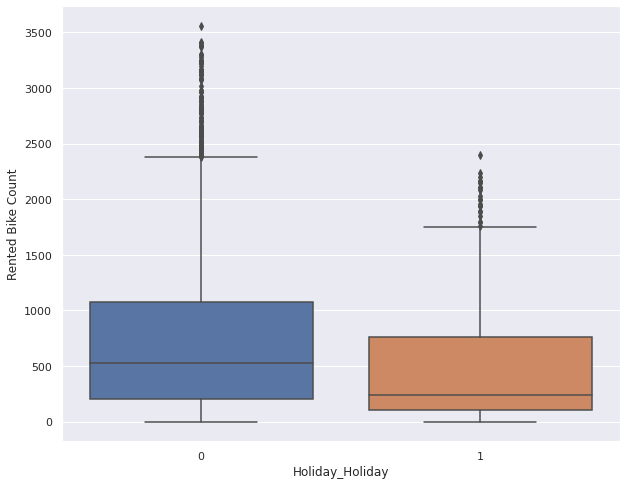

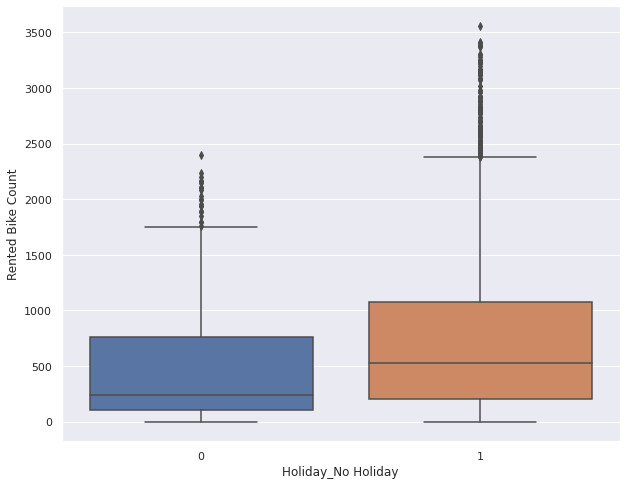

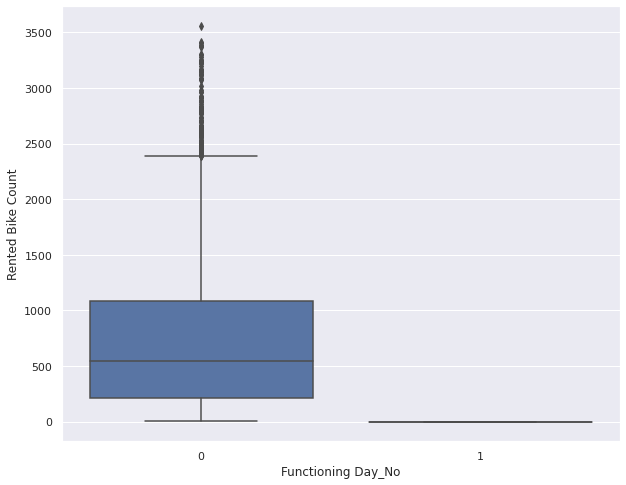

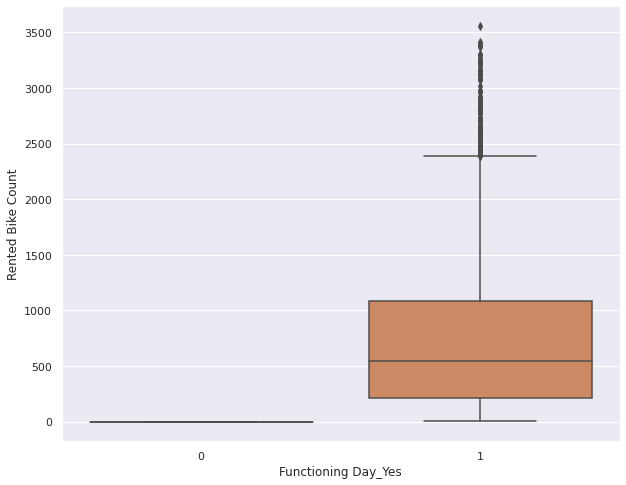

In [188]:
for col in categorical_feature.columns:
  plt.figure(figsize=(10,8))
  sns.boxplot(x=df[col],y=df["Rented Bike Count"])
  plt.show()

since their are no bike booking when it is not a functional day we can drop that column

In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Seasons_Autumn             8760 non-null   uint8  
 1   Seasons_Spring             8760 non-null   uint8  
 2   Seasons_Summer             8760 non-null   uint8  
 3   Seasons_Winter             8760 non-null   uint8  
 4   Holiday_Holiday            8760 non-null   uint8  
 5   Holiday_No Holiday         8760 non-null   uint8  
 6   Functioning Day_No         8760 non-null   uint8  
 7   Functioning Day_Yes        8760 non-null   uint8  
 8   Rented Bike Count          8760 non-null   int64  
 9   Hour                       8760 non-null   int64  
 10  Temperature(°C)            8760 non-null   float64
 11  Humidity(%)                8760 non-null   int64  
 12  Wind speed (m/s)           8760 non-null   float64
 13  Visibility (10m)           8760 non-null   int64

---
#linear reg
---

In [191]:
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
def score_metrix (actual,predicted):
  MSE  = mean_squared_error(actual,predicted)
  print("MSE :" , MSE)

  RMSE = np.sqrt(MSE)
  print("RMSE :" ,RMSE)

  r2 = r2_score(actual,predicted)
  print("R2 :" ,r2)
  print("Adjusted R2 : ",1-(1-r2_score(actual,predicted))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

In [192]:
X=df[[i for i in df.columns if i not in [['Rented Bike Count','Dew point temperature(°C)','Functioning Day_No','Functioning Day_Yes']]]]
Y=np.sqrt(df['Rented Bike Count'])

In [221]:
X

,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_Holiday,Holiday_No Holiday,Functioning Day_No,Functioning Day_Yes,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),month,weekdays_weekend
0,0,0,0,1,0,1,0,1,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,1,0
1,0,0,0,1,0,1,0,1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,1,0
2,0,0,0,1,0,1,0,1,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,1,0
3,0,0,0,1,0,1,0,1,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,1,0
4,0,0,0,1,0,1,0,1,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1,0,0,0,0,1,0,1,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,11,0
8756,1,0,0,0,0,1,0,1,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,11,0
8757,1,0,0,0,0,1,0,1,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,11,0
8758,1,0,0,0,0,1,0,1,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,11,0


In [193]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.25, random_state=1)

In [194]:
#STANDARD SCALER
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)

In [195]:
X_train[0:10]

array([[-0.57559273, -0.57488971, -0.58004517,  1.72749323, -0.22738694,
         0.22738694, -0.18525631,  0.18525631, -0.92025642, -1.36874406,
        -1.71165528,  0.47421008, -0.78354199,  0.33582343, -1.26534686,
        -0.65163688, -0.12795769,  4.46880116,  1.58899392, -0.63265769],
       [-0.57559273, -0.57488971,  1.72400366, -0.57887347, -0.22738694,
         0.22738694, -0.18525631,  0.18525631,  0.23263946, -1.65701618,
         1.34968356,  0.91576468,  0.36961183,  0.04394787,  1.55928395,
        -0.65163688, -0.12795769, -0.17658844,  0.42922165, -0.63265769],
       [ 1.73733952, -0.57488971, -0.58004517, -0.57887347, -0.22738694,
         0.22738694, -0.18525631,  0.18525631,  0.77117338, -0.35979168,
         0.7855344 ,  0.5232717 , -0.39915738,  0.92617061,  0.92905718,
         0.05429838, -0.12795769, -0.17658844,  0.71916472, -0.63265769],
       [-0.57559273, -0.57488971, -0.58004517,  1.72749323, -0.22738694,
         0.22738694, -0.18525631,  0.18525631, -

In [196]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [197]:
# Predicting the Test set results
Y_pred = regressor.predict(X_test)

In [219]:
regressor.score(X_test,Y_test)

0.9656970733067396

In [220]:
regressor.score(X_train,Y_train)

0.9641385581790252

In [198]:
score_metrix(Y_test**2,Y_pred**2)

MSE : 17744.683569941328
RMSE : 133.2091722440363
R2 : 0.9568395794257396
Adjusted R2 :  0.9564416041322932


##lasso reg

In [199]:
from sklearn.linear_model import Lasso
lasso  = Lasso(alpha=0.0001 , max_iter= 3000)

lasso.fit(X_train, Y_train)

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=3000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [200]:
lasso.score(X_train, Y_train)

0.9641452050213856

In [201]:
lasso.coef_

array([ 5.04947903e-01,  2.03221589e-01,  2.56164609e-01, -4.27561282e-01,
       -1.73559119e-01,  0.00000000e+00, -2.40787314e+00,  2.39386052e-14,
        1.03672620e+01,  3.76880045e-01, -2.36084394e+00, -2.02316673e+00,
       -1.53077162e-01, -9.68834960e-02,  3.50506890e+00,  4.84047480e-01,
       -6.19441583e-01, -1.31694042e-01,  9.97249517e-02, -4.31237323e-02])

In [202]:
### Cross validation
from sklearn.model_selection import GridSearchCV
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14908.974555830713, tolerance: 82.27202929340118
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14543.52995252984, tolerance: 81.19969333949157
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14518.955354115038, tolerance: 82.60588082362831
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14729.8455

GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.0014]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [203]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.0001}

Using  {'alpha': 0.0001}  the negative mean squared error is:  -5.666541417636336


In [204]:
y_pred_lasso = lasso_regressor.predict(X_test)

In [205]:
score_metrix(Y_test**2,y_pred_lasso**2)

MSE : 17829.136821882516
RMSE : 133.5257908491184
R2 : 0.9566341636538394
Adjusted R2 :  0.9562342942546125


##Ridge reg

In [206]:
from sklearn.linear_model import Ridge
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100,0.5,1.5,1.6,1.7,1.8,1.9]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train,Y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100, 0.5, 1.5, 1.6, 1.7, 1.8, 1.9]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [207]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1e-15}

Using  {'alpha': 1e-15}  the negative mean squared error is:  -5.6666045291411935


In [208]:
y_pred_ridge = ridge_regressor.predict(X_test)

In [209]:
score_metrix(Y_test**2,y_pred_ridge**2)

MSE : 17829.15941707622
RMSE : 133.52587545893948
R2 : 0.9566341086955156
Adjusted R2 :  0.9562342387895267


## Elastic Net

In [210]:
from sklearn.linear_model import ElasticNet
#a * L1 + b * L2
#alpha = a + b and l1_ratio = a / (a + b)
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [211]:
elasticnet.fit(X_train,Y_train)

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [212]:
elasticnet.score(X_train, Y_train)

0.9610654752818665

In [213]:
y_pred_en = elasticnet.predict(X_test)


In [214]:
score_metrix(Y_test**2,y_pred_en**2)

MSE : 12995.189712204341
RMSE : 113.99644605076222
R2 : 0.9683917804896142
Adjusted R2 :  0.9681003261833865


In [215]:
elastic = ElasticNet()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8]}
elastic_regressor = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=5)
elastic_regressor.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14908.974558947342, tolerance: 82.27202929340118
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14543.529956442913, tolerance: 81.19969333949157
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14518.955359937914, tolerance: 82.60588082362831
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14729.845

GridSearchCV(cv=5, error_score=nan,
             estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True,
                                  l1_ratio=0.5, max_iter=1000, normalize=False,
                                  positive=False, precompute=False,
                                  random_state=None, selection='cyclic',
                                  tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [216]:
print("The best fit alpha value is found out to be :" ,elastic_regressor.best_params_)
print("\nUsing ",elastic_regressor.best_params_, " the negative mean squared error is: ", elastic_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1e-05, 'l1_ratio': 0.8}

Using  {'alpha': 1e-05, 'l1_ratio': 0.8}  the negative mean squared error is:  -5.666552123736492


In [217]:
y_pred_elastic = elastic_regressor.predict(X_test)

In [218]:
score_metrix(Y_test**2,y_pred_elastic**2)

MSE : 17828.793640411368
RMSE : 133.52450576733608
R2 : 0.9566349983746485
Adjusted R2 :  0.9562351366722478


---
# random forest
---

In [354]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rented Bike Count        8760 non-null   int64  
 1   Hour                     8760 non-null   int64  
 2   Temperature(°C)          8760 non-null   float64
 3   Humidity(%)              8760 non-null   int64  
 4   Wind speed (m/s)         8760 non-null   float64
 5   Visibility (10m)         8760 non-null   int64  
 6   Solar Radiation (MJ/m2)  8760 non-null   float64
 7   Rainfall(mm)             8760 non-null   float64
 8   Snowfall (cm)            8760 non-null   float64
 9   Functioning Day          8760 non-null   int64  
 10  day                      8760 non-null   int64  
 11  month                    8760 non-null   int64  
 12  day_of_week_Friday       8760 non-null   uint8  
 13  day_of_week_Monday       8760 non-null   uint8  
 14  day_of_week_Saturday    

In [355]:
# Data for all the independent variables
X = df.drop(columns=['Rented Bike Count','day'],axis=1)

# Data for the dependent variable
Y = df['Rented Bike Count']

In [356]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.25, random_state=1)

In [357]:
from sklearn.ensemble import RandomForestRegressor

In [358]:
rfc=RandomForestRegressor(max_leaf_nodes=20)

In [359]:
rfc.fit(X_train,Y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=20,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [360]:
rfc.score(X_train,Y_train)


0.8017233021831328

In [361]:
rfc.score(X_test,Y_test)

0.7847601394716163

In [362]:
train_class_preds_rfc = rfc.predict(X_train)
Y_pred_rf = rfc.predict(X_test)

In [363]:
pd.DataFrame(np.isnan(Y_pred_rf)).value_counts()

False    2190
dtype: int64

In [366]:
MSE  = mean_squared_error(Y_test,Y_pred_rf)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(Y_test,Y_pred_rf)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(Y_test,Y_pred_rf))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 88492.26133334359
RMSE : 297.47648870682804
R2 : 0.7847601394716163
Adjusted R2 :  0.7824745823191912


In [ ]:
plt.figure(figsize=(100
                    ,50))
plt.plot(Y_pred)
plt.plot(np.array(Y_test))
plt.legend(["Predicted","Actual"])
plt.show()

## implimenting grid search random forest
---

In [367]:
rfc=RandomForestRegressor()

In [368]:
grid_values_rf = {'n_estimators': [80, 100,120],'max_depth': [13,14,15]}

In [369]:
rfc_grid = GridSearchCV(estimator=rfc,param_grid = grid_values_rf, scoring='neg_mean_squared_error',cv=5)

In [370]:
rfc_grid.fit(X_train,Y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [371]:
rfc_grid.score(X_train,Y_train)

-9476.639199618

In [372]:
rfc_grid.best_params_

{'max_depth': 15, 'n_estimators': 120}

In [373]:
train_class_preds_rfc = rfc_grid.predict(X_train)
test_class_preds_rfc = rfc_grid.predict(X_test)

In [374]:
MSE  = mean_squared_error(Y_test,test_class_preds_rfc)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(Y_test,test_class_preds_rfc)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(Y_test,test_class_preds_rfc))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 46352.42877753901
RMSE : 215.29614204053684
R2 : 0.8872569176682337
Adjusted R2 :  0.8860597381236212


## BayesSearchCV
---

In [375]:
pip install scikit-optimize

     |████████████████████████████████| 101 kB 4.9 MB/s 


In [376]:
grid_values_bs = {'bootstrap': [True, False],
                  'max_depth': [10,12,14,16],
                  'max_features': ['auto', 'sqrt'],
                  'min_samples_leaf': [1, 2, 4],
                  'min_samples_split': [2, 5, 10],
                  'n_estimators': [60,80,100,120,140]}


In [377]:
from skopt import BayesSearchCV
opt = BayesSearchCV(RandomForestRegressor(random_state=42),
                    grid_values_bs,
                    n_iter=32,
                    cv=5,
                    scoring='neg_mean_squared_error')
opt.fit(X_train, Y_train)

print("val. score: %s" % opt.best_score_)
print("test score: %s" % opt.score(X_test, Y_test))

/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.7/dist-packa

val. score: -46774.10072710839
test score: -46651.78715638948


In [378]:
opt.best_params_

OrderedDict([('bootstrap', True),
             ('max_depth', 16),
             ('max_features', 'auto'),
             ('min_samples_leaf', 2),
             ('min_samples_split', 5),
             ('n_estimators', 60)])

OrderedDict([('bootstrap', True),
             ('max_depth', 14),
             ('max_features', 'auto'),
             ('min_samples_leaf', 2),
             ('min_samples_split', 5),
             ('n_estimators', 80)])

In [379]:
opt.score(X_train,Y_train)

-12378.570325882409

In [380]:
Y_opt_pred=opt.predict(X_test)

In [381]:
model.fit(X_train, Y_train)
# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, Y_test)

NameError: ignored

In [ ]:
import pickle
# save the model to disk
pickle.dump(opt, open(model_file_path, 'wb'))

In [ ]:
MSE  = mean_squared_error(Y_test,Y_opt_pred)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(Y_test,Y_opt_pred)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(Y_test,Y_opt_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

In [ ]:
# MSE : 53327.59452818893
# RMSE : 230.927682463989
# R2 : 0.8702912115069137
# Adjusted R2 :  0.8692759953907154

In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

In [ ]:
graph = Source(tree.export_graphviz(opt, out_file=None
   , feature_names=X_train.columns, class_names=['0', '1'] 
   , filled = True))
display(SVG(graph.pipe(format='svg')))